Mejor solución encontrada: [2, 6, 4, 1, 7, 0, 7, 3]
Número de conflictos: 2


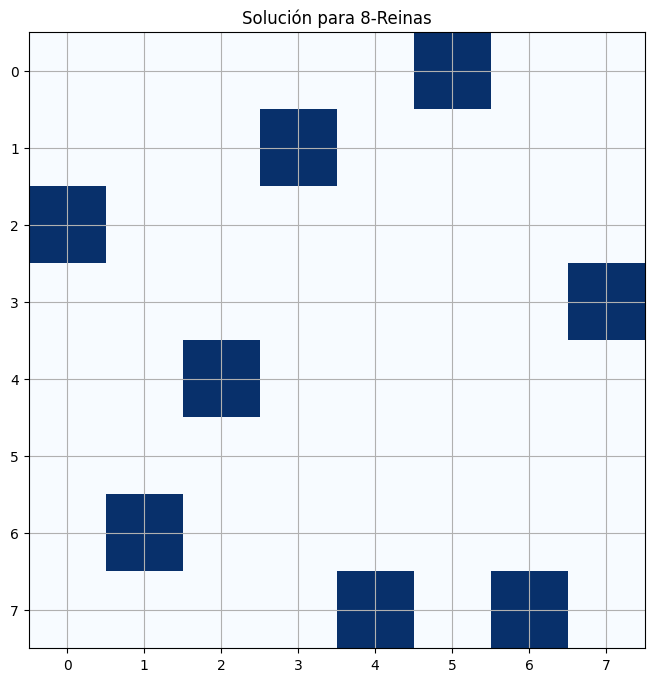

In [16]:
import numpy as np
import random
import math
import matplotlib.pyplot as plt

# Función para evaluar el costo de una configuración (el número de conflictos)
def evaluar(conf):
    conflictos = 0
    n = len(conf)
    for i in range(n):
        for j in range(i + 1, n):
            if conf[i] == conf[j] or abs(conf[i] - conf[j]) == abs(i - j):
                conflictos += 1
    return conflictos

# Función para generar una vecina (mover una reina aleatoriamente)
def generar_vecina(conf):
    n = len(conf)
    vecina = conf.copy()
    i = random.randint(0, n - 1)
    j = random.randint(0, n - 1)
    vecina[i] = j
    return vecina

# Función Simulated Annealing
def simulated_annealing(n, temp_inicial=1000, temp_final=1, alpha=0.995, iter_max=1000):
    # Inicializar una configuración aleatoria
    estado_actual = list(np.random.permutation(n))
    costo_actual = evaluar(estado_actual)

    # Mejor solución encontrada
    mejor_estado = estado_actual
    mejor_costo = costo_actual

    temp = temp_inicial
    iteraciones = 0

    # Ciclo de Simulated Annealing
    while temp > temp_final and iteraciones < iter_max:
        # Generar una vecina aleatoria
        vecino = generar_vecina(estado_actual)
        costo_vecino = evaluar(vecino)

        # Si el vecino es mejor, lo aceptamos
        if costo_vecino < costo_actual:
            estado_actual = vecino
            costo_actual = costo_vecino
        else:
            # Si el vecino es peor, lo aceptamos con una probabilidad
            prob = math.exp(-(costo_vecino - costo_actual) / temp)
            if random.random() < prob:
                estado_actual = vecino
                costo_actual = costo_vecino

        # Si encontramos una solución mejor, actualizamos
        if costo_actual < mejor_costo:
            mejor_estado = estado_actual
            mejor_costo = costo_actual

        # Reducir la temperatura
        temp *= alpha
        iteraciones += 1

    return mejor_estado, mejor_costo

# Ejemplo con n = 8 (tablero de 8x8)
n = 8
solucion, costo = simulated_annealing(n)
print("Mejor solución encontrada:", solucion)
print("Número de conflictos:", costo)

# Mostrar la solución
def mostrar_tablero(n, solucion):
    tablero = np.zeros((n, n), dtype=int)
    for i in range(n):
        tablero[solucion[i], i] = 1  # Colocamos las reinas
    plt.figure(figsize=(8, 8))
    plt.imshow(tablero, cmap="Blues", interpolation="nearest")
    plt.title(f"Solución para {n}-Reinas")
    plt.xticks(range(n))
    plt.yticks(range(n))
    plt.grid(True)
    plt.show()

mostrar_tablero(n, solucion)


